# WeatherPy
----

#### Note
Analysis included after each plot and in ReadMe file

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/output_data_cities.csv"
city_data_df = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
city_name = cities

#create unique url
query_url = f'{url}&units={units}&appid={weather_api_key}&q='

#create empty lists
temp = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lng = []
cities_with_data = []
country = []
counter = 1

for city in cities:
    #call data
    response = requests.get(query_url + city).json()
    print(f'Entry #{counter} | {city}')
    print('--------------------------')
    try:
        #append data to empty lists
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cities_with_data.append(response['name'])
        country.append(response['sys']['country'])
    
    #pass cities with incomplete dictionaries
    except KeyError:
        print("City data not found. Skipping entry.")
        print('----------------------------')
        pass


Entry #1 | hobart
--------------------------
Entry #1 | amderma
--------------------------
City data not found. Skipping entry.
----------------------------
Entry #1 | cape town
--------------------------
Entry #1 | belushya guba
--------------------------
City data not found. Skipping entry.
----------------------------
Entry #1 | sao filipe
--------------------------
Entry #1 | butaritari
--------------------------
Entry #1 | atuona
--------------------------
Entry #1 | cabo san lucas
--------------------------
Entry #1 | saldanha
--------------------------
Entry #1 | katsuura
--------------------------
Entry #1 | ribeira grande
--------------------------
Entry #1 | jamestown
--------------------------
Entry #1 | the valley
--------------------------
Entry #1 | port elizabeth
--------------------------
Entry #1 | ushuaia
--------------------------
Entry #1 | yar-sale
--------------------------
Entry #1 | jimo
--------------------------
Entry #1 | punta arenas
------------------------

KeyboardInterrupt: 

### Convert Raw Data to DataFrame

In [140]:
#create dataframe from appended lists
weather_data_df = pd.DataFrame({'City':cities_with_data,
                                'Latitude':lat,
                                'Longitude':lng,
                                'Temperature':temp,
                                'Humidity (%)':humidity,
                                'Cloudiness (%)':cloudiness,
                                'Wind Speed (mph)':wind_speed,
                                'Country':country})
weather_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph),Country
0,Chernyshevskiy,63.0128,112.4714,31.87,72,11,2.71,RU
1,Popondetta,-8.7537,148.2534,75.36,93,100,1.03,PG
2,Impfondo,1.6381,18.0667,71.56,98,100,1.45,CG
3,Rikitea,-23.1203,-134.9692,75.92,64,76,9.98,PF
4,Port Elizabeth,-33.9180,25.5701,60.80,82,0,20.71,ZA


In [141]:
weather_data_df.to_csv('Output/weather_data.csv', index=False, header=True)

In [142]:
weather_data_df.describe()

,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,18.865110,16.851026,62.006497,71.074830,54.411565,6.895748
std,33.011985,90.030232,18.739991,21.842268,39.684368,4.526738
min,-54.800000,-175.200000,12.760000,8.000000,0.000000,0.220000
25%,-7.922925,-59.759675,48.935000,61.000000,9.000000,3.575000
50%,20.591800,19.130550,66.200000,76.500000,68.000000,5.750000
75%,47.294600,96.138050,77.000000,88.000000,95.000000,9.197500
max,78.218600,179.316700,97.050000,100.000000,100.000000,26.460000


## Plotting the Data

## Latitude vs. Temperature Plot

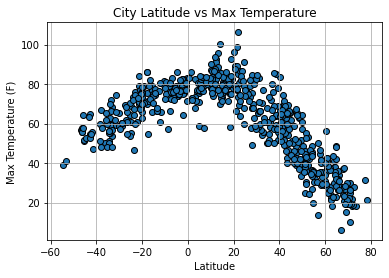

In [119]:
#create scatterplot
plt.scatter(weather_data_df['Latitude'], weather_data_df['Temperature'], marker='o',edgecolors='black')

#make labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/TempInWorldCities.png")

plt.show()


### Analysis
It does appear that there is a curvilinear relationship between latitude and temperature. The closer that an individual gets to the equater, the higher the temperature can be expected to be. 

## Latitude vs. Humidity Plot

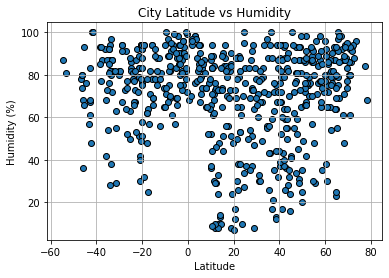

In [120]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Humidity (%)'], marker='o',edgecolors='black')

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/HumidityInWorldCities.png")

plt.show()

### Analysis
There does not appear to be a relationship between humidity and latitude. The points are scattered randomly and do not seem to have any sort of patterning.

## Latitude vs. Cloudiness Plot

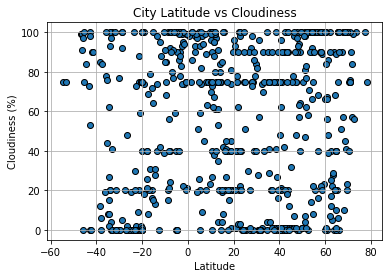

In [121]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Cloudiness (%)'], marker='o',edgecolors='black')

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/CloudInWorldCities.png")

plt.show()

### Analysis
Again, there does not appear to be a relationship between cloudiness and latitude. There is even more spread between these data points and no obvious patterning. 

## Latitude vs. Wind Speed Plot

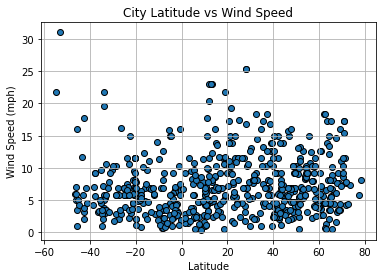

In [122]:
plt.scatter(weather_data_df['Latitude'], weather_data_df['Wind Speed (mph)'], marker='o',edgecolors='black')

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/WindInWorldCities.png")

plt.show()

### Analysis
There is no obvious relationship between latitude and wind speed. However, there does appear to be a few outlier that could be skewing the data. 

## Linear Regression

In [92]:
north_hemi = weather_data_df.loc[weather_data_df['Latitude']>=0]
south_hemi = weather_data_df.loc[weather_data_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7917522786615461


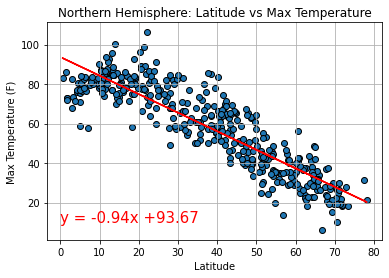

In [123]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Temperature']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/NorthHemisphereTemp.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6125415402538701


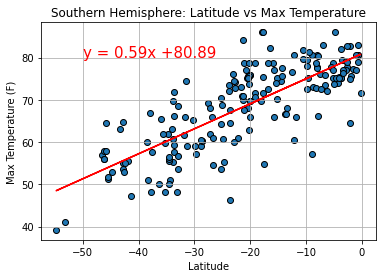

In [124]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Temperature']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/SouthHemisphereTemp.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

### Analysis
From these graphs, we can see that the northern and southern hemispheres have opposite realtionships with temperature. The northern hemisphere has a negative relationship, so as latitude increases, temperature decreases. The southern hemisphere has a positive relationship, so as latitude increases, as does temperature. The northern hemisphere also appears to have a stronger relationship with temperature than the southern hemisphere, however this could be due to differences in sample sizes. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03107855045630004


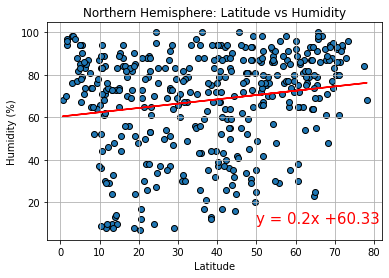

In [125]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Humidity (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/NorthHemisphereHumid.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.030780342197763346


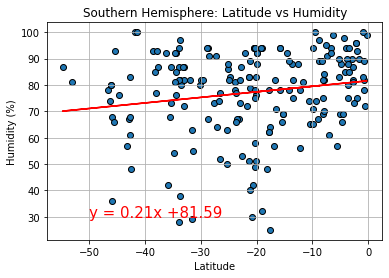

In [126]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Humidity (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/SouthHemisphereHumid.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

### Analysis
There does not appear to be a difference between the southern and northern hemispheres in relation to humidity. Location does not seem to have an influence on humidity as there was no overall relationship and no difference between the northern and southern hemishpere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0004973529743316581


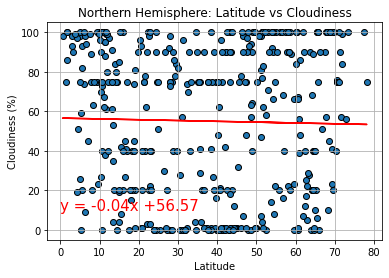

In [127]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Cloudiness (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/NorthHemisphereCloud.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.021070559511701364


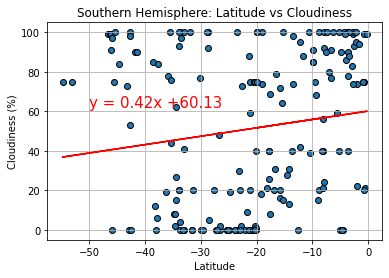

In [128]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Cloudiness (%)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/SouthHemisphereCloud.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,62),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

### Analysis
Neither the northern or southern hemispheres appear to have a significant relationship with cloudiness. But, the relationship between cloudiness and latitude does appear to be stronger in the southern hemisphere than in the northern hemisphere. This indicates that longitude could have a weak relationship with cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.000454583768905265


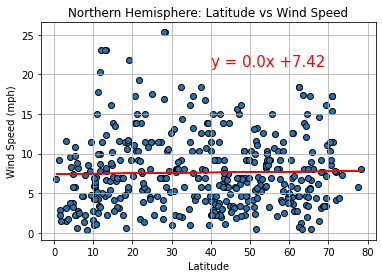

In [129]:
#create scatterplot
x_axis = north_hemi['Latitude']
y_axis = north_hemi['Wind Speed (mph)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/NorthHemisphereWind.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(40,21),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.040378407373875186


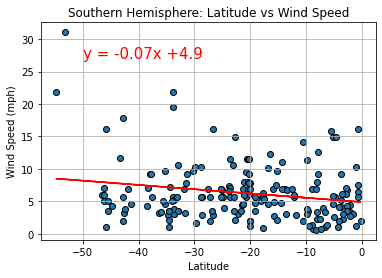

In [130]:
#create scatterplot
x_axis = south_hemi['Latitude']
y_axis = south_hemi['Wind Speed (mph)']
plt.scatter(x_axis, y_axis, marker='o',edgecolors='black')

#make labels
plt.title("Southern Hemisphere: Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Images/SouthHemisphereWind.png")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
#regression values
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,27),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
#print r value
print(f"The r-value is: {rvalue**2}")

plt.show()

### Analysis
There is a similar pattern with wind speed as there was with cloudiness. There isn't a significant relationship that can be observed in either the northern or southern hemisphere, but the southern hemis